3.	Import the required packages

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [6]:
pd.read_csv('../data/gdp_percapita.csv')

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN


In [7]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [8]:
gdp_df.head(2)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN


In [9]:
gdp_df.tail(2)

,Country or Area,Year,Value,Value Footnotes
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [10]:
gdp_df.shape

(7176, 4)

This is the data type of the whole structure.

In [11]:
type(gdp_df)

pandas.core.frame.DataFrame

This is the data type of the columns.

In [12]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [13]:
data_types = gdp_df.dtypes

In [14]:
print(data_types)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


In [15]:
data_types

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [16]:
%who

data_types	 gdp_df	 np	 pd	 plt	 sns	 


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [17]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [18]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [19]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [20]:
gdp_df.columns = ('Country','Year','GDP_per_capita')

In [21]:
gdp_df

,Country,Year,GDP_per_capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [22]:
gdp_df.head(2)

,Country,Year,GDP_per_capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [23]:
gdp_df['Year'].value_counts()

Year
2018    242
2017    242
2016    242
2015    242
2014    242
2013    242
2019    241
2020    240
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
1999    227
1998    226
1997    226
1996    222
1995    222
1994    211
1993    209
1992    208
1991    207
1990    206
Name: count, dtype: int64

In [24]:
gdp_df['Country'].value_counts()

Country
Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: count, Length: 242, dtype: int64

In [25]:
country_count = gdp_df['Country'].value_counts().to_frame()

In [26]:
country_count

,count
Country,
Least developed countries: UN classification,31
Niger,31
Middle East & North Africa (IDA & IBRD),31
Middle income,31
Mongolia,31
...,...
Kosovo,13
Turks and Caicos Islands,10
Sint Maarten (Dutch part),10


In [30]:
country_count.reset_index()

,Country,count
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8


In [33]:
country_count.query('count == 31')

,count
Country,
Least developed countries: UN classification,31
Niger,31
Middle East & North Africa (IDA & IBRD),31
Middle income,31
Mongolia,31
...,...
IDA only,31
Fragile and conflict affected situations,31
Ireland,31


So 205 countries have data for all the years.

In [36]:
countries_with_less_data = country_count.query('count < 31')

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [46]:
gdp2020 = gdp_df.query('Year == 2020')

Histogram

<Axes: xlabel='GDP_per_capita', ylabel='Count'>

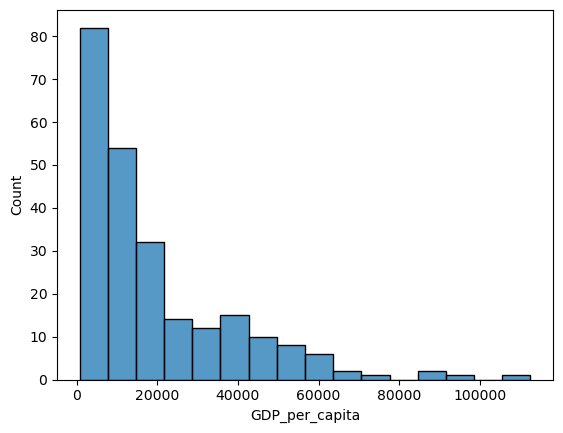

In [65]:
sns.histplot(data=gdp2020, x = 'GDP_per_capita')

Density plot

Boxplot

Violin plot

<Axes: xlabel='Year', ylabel='GDP_per_capita'>

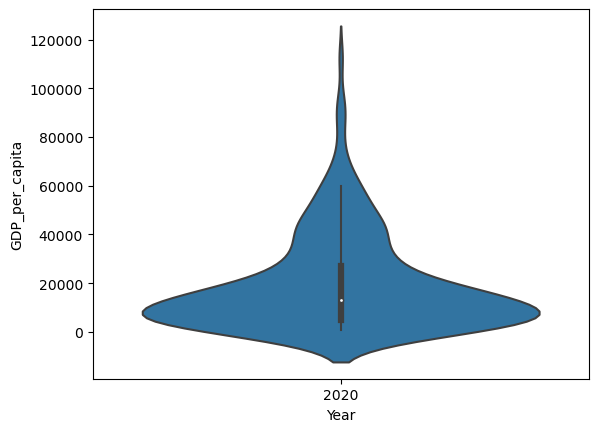

In [57]:
sns.violinplot(x=gdp2020["Year"], y=gdp2020["GDP_per_capita"])

Scatterplot

Text(0, 0.5, 'GDP_per_capita')

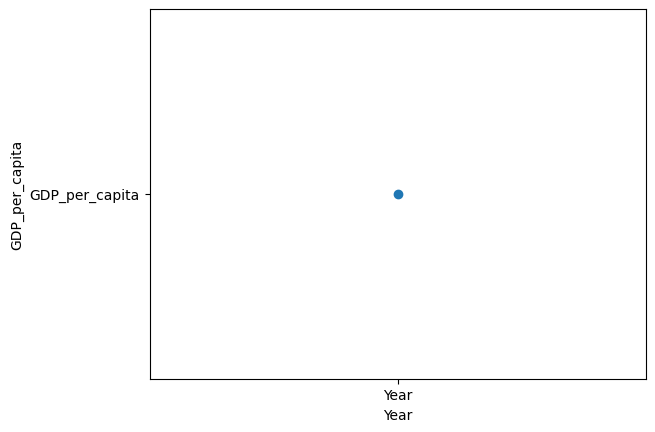

In [47]:
plt.scatter(x = 'Year', y = 'GDP_per_capita', data = 'gdp2020')
plt.xlabel('Year')
plt.ylabel('GDP_per_capita')